In [86]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉'], dtype=object)

In [87]:
lai = fb[fb.page_name == "賴士葆"]
lai.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
14740,1573873889493647_2261214444092918,1573873889493647,賴士葆,公眾人物,蔡英文昨天首度透露決策過程，表示她不同意管中閔上台的立場，她說行政院在事後檢討過程時還討論可否能把核准管中閔的公文追回來，但是政務委員認為葉俊榮是於法有據。蔡英文這些說明至今仍是隱晦不明，結論就是既要面子又要裡子，知道主流民意是希望管中閔上台，但是又要迎合獨派人士的反管立場。\n\n請問1:58分的時候得知葉俊榮3點要開記者會宣布，如果真的堅決反對，一通電話就可以阻止，為什麼不打？佯裝很無辜的說，沒想到葉俊榮沒有跟她報告就開記者會宣布了，這樣好像很矯情。現在管中閔上台了，監察院立刻通過彈劾他違法兼職，這中間有什麼算計？\n \n \n \n https://newtalk.tw/news/view/2019-01-15/194723,NaN,link,https://www.facebook.com/1573873889493647/posts/2261214444092918/,2019-01-15T08:22:23+0000,2019-01-15T16:22:23,...,管中閔遭彈劾 鄉民表示「這樣算兼職？」 | 政治 | 新頭殼 Newtalk,針對台大校長管中閔過去擔任學校主管及政府部門任職時在外兼職違法事宜，監察院今（15）日通過予以彈劾。管中閔之前遭爆料疑過去擔任公職期間，以不具名方式在某週刊寫專欄，每年領取稿費達60餘萬元，幾年下來累積數.....,968,0,0,0,0,0,133,93


In [88]:
lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
lai['month_year'] = pd.to_datetime(lai['new_date']).dt.to_period('M')
lai.head(1)

<ipython-input-88-fd71a2caad7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
<ipython-input-88-fd71a2caad7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['month_year'] = pd.to_datetime(lai['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
14740,1573873889493647_2261214444092918,1573873889493647,賴士葆,公眾人物,蔡英文昨天首度透露決策過程，表示她不同意管中閔上台的立場，她說行政院在事後檢討過程時還討論可否能把核准管中閔的公文追回來，但是政務委員認為葉俊榮是於法有據。蔡英文這些說明至今仍是隱晦不明，結論就是既要面子又要裡子，知道主流民意是希望管中閔上台，但是又要迎合獨派人士的反管立場。\n\n請問1:58分的時候得知葉俊榮3點要開記者會宣布，如果真的堅決反對，一通電話就可以阻止，為什麼不打？佯裝很無辜的說，沒想到葉俊榮沒有跟她報告就開記者會宣布了，這樣好像很矯情。現在管中閔上台了，監察院立刻通過彈劾他違法兼職，這中間有什麼算計？\n \n \n \n https://newtalk.tw/news/view/2019-01-15/194723,NaN,link,https://www.facebook.com/1573873889493647/posts/2261214444092918/,2019-01-15T08:22:23+0000,2019-01-15T16:22:23,...,968,0,0,0,0,0,133,93,2019-01-15,2019-01


In [89]:
# 依照按讚數 低到高排序
lai = lai.sort_values(by=['like_count'])
# 用新的排序當作順序
lai.reset_index(inplace=True)

結巴斷詞 jieba

1.len(lai): 看賴士葆的貼文總共有幾筆
2.list(lai['message']): 把要斷詞的內容轉成 list 格式
3.創造一個新的dataframe叫做lai_docs，型態是pandas.core.frame.DataFrame
4,原本lai_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [90]:
doc_names = range(len(lai)) #有幾篇文章 : 698 篇文章
doc_names

range(0, 698)

In [91]:
lai = lai.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(lai['message']) # 把所有message轉成一個list 用for iterate

In [95]:
# 先看第一個
words = jieba.lcut(text_list[10], cut_all = False) # lcut return a "list"
print(words)

['民進', '黨', '的', '總統', '初選', '讓', '民進', '黨', '人鬥狠', '的', '狼性', '展露', '無餘', '，', '過去', '對', '付國民黨', '那', '一套', '割', '脖子', '割到', '斷', '的', '血腥', '手段', '，', '現在', '用', '來', '對付', '自己', '人', '，', '更是', '有過', '之', '無', '不及', '。', '幾個', '月', '前', '蔡', '英文', '的', '民調', '超低', '，', '是', '所有', '藍綠', '總統擬', '參選人', '的', '最', '後', '一名', '，', '總統', '想要', '連任', '始終', '是', '街談', '巷議', '的', '笑', '話', '。', '惟', '全面', '執政', '的', '優勢', '，', '所有', '的', '行政', '資源', '全都', '為', '她', '效力', '，', '不顧', '程序', '正義', '，', '兩度', '延後初', '選時間', '，', '改變', '遊戲', '規則', '，', '加上', '網軍大舉', '助攻', '，', '蔡', '、', '賴兩', '人民', '調', '居然', '拉', '到', '伯仲', '之間', '。', '賴清德', '被', '逼急', '到', '喊', '出', '-', '「', '召喚', '黨魂', '，', '維', '繫', '黨', '德', '」', '，', '政黨', '輪', '替', '之', '後', '，', '踐', '踏', '民主', '法治', '違法', '違憲', '的', '事情', '，', '罄', '竹', '難書', '，', '民進', '黨', '早年', '為', '民主', '打拼', '的', '先進', '若', '真的', '還魂', '過來', '，', '肯定', '痛斥', '這些', '不肖', '後', '輩', '，', '過去', '捍衛', '民主', '理念', '，', '如今', '全黨', '沉淪', '背棄', '初衷', '與', '

In [98]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
lai_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
lai_docs['jieba_results'] = lai_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    lai_docs = lai_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [100]:
lai_docs.iloc[400:,]  #從讚數最多的檢查

,jieba_results
400,強烈 質疑 政府 部門 拒絕 就 學貸款 免息 幫助 學生
401,蔡 政府 回收 公投 民進黨 沉淪 到 剝奪 人民 作主 的 機會 公投 起家 的 民進黨 人 都 噤聲 只有 呂秀蓮講 公道 話
402,蔡碧仲忠黨 的 赤 誠 讓 人 咋舌 但是 再 怎麼 熱愛 民進黨 也 不應 該 用 法律 專業 來 唬 弄 全民 把 行政 中立 完全 推翻
403,
404,貧富 差距 連網 軍界 都 大得 嚇人 有 的 可以 拿標 案領 萬 有人 卻 只能 固定 月 領一萬 助日 代表 出來面 對 蟑螂 也 要 討 生活 請 檢調 追查 金 流 找出 幕 後 黑手
...,...
693,民進黨 真的 是 權力 中毒
694,將阿 扁關 回去 大家 一起 來 連署 動動 手指 頭點 下去 👉 歡迎 大家 加入 賴士 葆 的 @
695,將阿扁 關回 中監 木新 市場 聯署
696,請 大家 都 來 動員 支持 韓國瑜 參選 總統並 羸得 最後勝利


In [102]:
lai['jieba_results'] = lai_docs
lai_post = lai[['new_date','message','jieba_results','like_count']]
lai_post

,new_date,message,jieba_results,like_count
0,2019-04-18,,,21
1,2019-12-18,,,28
2,2019-03-09,好有創意！\n\n世界經濟論壇 (World Economic Forum) PO 出這樣一則影片，挪威一個叫做Rjukan的小鎮，由於身處峽谷之中，一年有很多時間照不到陽光，於是他們裝了好幾片大鏡子，讓陽光能夠反射到小鎮裡，帶給大家光明與希望。\n\n#不過鏡子不便宜要85萬美金,好 有 創意 世界 經濟 論壇 出 這樣 一則 影片 挪威 一個 叫做 的 小鎮 由 於 身處 峽谷 之中 一年 有 很多 時間 照不到 陽光 於 是 他們 裝了 好 幾片 大鏡子 讓 陽光 能夠 反射 到 小鎮裡 帶給 大家 光明 與 希望 不過 鏡子 不 便宜 要 萬 美金,79
3,2019-01-12,今早跟粉絲們分享在美國消費性電子展 (CES)上展出的自動摺衣服機後，很高興的跟老婆說分享。沒想到老婆平淡的回了我一句：「有你就夠啦！」我被打臉了...哭哭....哈哈！\n\n#國家政策是以核養綠\n#我家政策是以手養綠\n#老婆說的話都要聽從,今早 跟 粉絲們 分享 在 美國 消費性 電子展 上 展出 的 自動 摺 衣服 機 後 很 高興 的 跟 老婆 說 分享 沒 想到 老婆 平淡 的 回 了 我 一句 有 你 就夠 啦 我 被 打 臉 了 哭哭 哈哈 國家 政策 是 以 核養 綠 我家 政策 是 以 手養 綠 老婆 說 的 話 都 要 聽 從,108
4,2019-05-10,媒體報導賴清德在日本訪問表示，若當選總統將推動日本食品進口解禁，接著賴清德辦公室更正說：「這樣的說法與事實不符。」賴清德表示要尊重公投的結果，兼顧國人在意的食安問題，然後又說也要兼顧與其他國家的國際貿易，他說：「國際有一定標準，台灣要參加CPTPP(跨太平洋夥伴全面進展協定)，也要根據國際標準，不可以自設門檻，這樣沒辦法參加CPTPP。」這就是政治人物的兩面手法，想要討好選票，又要討好日本人，到底怎麼兼顧，這兩者之間就是悖逆不能共存的，不想犧牲國人的健康，不希望吃核災食品就是自設門檻，這是什麼道理！民進黨政府一向是嘴巴說尊重公投的結果，但是實際上不理會公投的結果，同婚議題和以核養綠照樣我行我素就是證明。\n\nhttps://udn.com/news/amp/story/12539/3508726,媒體 報導賴 清德 在 日本 訪問 表示 若 當選 總統將 推動 日本 食品 進口 解禁 接著賴 清德辦 公室 更正 說 這樣 的 說 法 與 事實 不符 賴清德 表示 要 尊重 公投 的 結果 兼顧 國人 在意 的 食安 問題 然 後 又 說 也 要 兼顧 與 其他 國家 的 國際 貿易 他 說 國際 有 一定 標準 台灣 要 參加 跨 太平洋 夥伴 全面 進展 協定 也 要 根據 國際 標準 不 可以 自設 門檻 這樣 沒 辦法 參加 這 就是 政治 人物 的 兩面 手法 想要 討好 選票 又 要 討好 日本 人 到底 怎麼 兼顧 這兩者 之間 就是 悖逆 不能 共存 的 不想 犧牲 國人 的 健康 不 希望 吃 核災 食品 就是 自設 門檻 這是 什麼 道理 民進黨 政府 一向 是 嘴巴 說 尊重 公投 的 結果 但是 實際 上 不理 會 公投 的 結果 同婚 議題 和 以 核養 綠照樣 我行我素 就是 證明,148
...,...,...,...,...
693,2019-06-24,民進黨真的是「權力中毒」！,民進黨 真的 是 權力 中毒,10494
694,2019-03-28,將阿扁關回去，大家一起來連署! \n動動手指頭點下去 👉 http://abao.tw/ab/\n\n歡迎大家加入賴士葆的Line@：http://abao.tw/line,將阿 扁關 回去 大家 一起 來 連署 動動 手指 頭點 下去 👉 歡迎 大家 加入 賴士 葆 的 @,11096
695,2019-03-24,「將阿扁關回中監」木新市場聯署,將阿扁 關回 中監 木新 市場 聯署,12125
696,2019-07-17,請大家都來動員支持韓國瑜參選總統並羸得最後勝利！,請 大家 都 來 動員 支持 韓國瑜 參選 總統並 羸得 最後勝利,15618


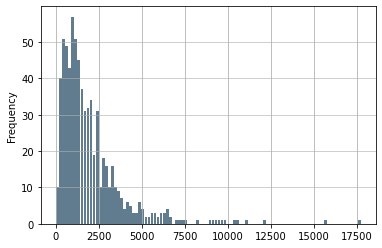

In [103]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = lai_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [104]:
temp = lai_post[(lai_post['like_count'] <= 500) & (lai_post['like_count'] > 100)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
3,2019-01-12,今早跟粉絲們分享在美國消費性電子展 (CES)上展出的自動摺衣服機後，很高興的跟老婆說分享。沒想到老婆平淡的回了我一句：「有你就夠啦！」我被打臉了...哭哭....哈哈！\n\n#國家政策是以核養綠\n#我家政策是以手養綠\n#老婆說的話都要聽從,今早 跟 粉絲們 分享 在 美國 消費性 電子展 上 展出 的 自動 摺 衣服 機 後 很 高興 的 跟 老婆 說 分享 沒 想到 老婆 平淡 的 回 了 我 一句 有 你 就夠 啦 我 被 打 臉 了 哭哭 哈哈 國家 政策 是 以 核養 綠 我家 政策 是 以 手養 綠 老婆 說 的 話 都 要 聽 從,108
4,2019-05-10,媒體報導賴清德在日本訪問表示，若當選總統將推動日本食品進口解禁，接著賴清德辦公室更正說：「這樣的說法與事實不符。」賴清德表示要尊重公投的結果，兼顧國人在意的食安問題，然後又說也要兼顧與其他國家的國際貿易，他說：「國際有一定標準，台灣要參加CPTPP(跨太平洋夥伴全面進展協定)，也要根據國際標準，不可以自設門檻，這樣沒辦法參加CPTPP。」這就是政治人物的兩面手法，想要討好選票，又要討好日本人，到底怎麼兼顧，這兩者之間就是悖逆不能共存的，不想犧牲國人的健康，不希望吃核災食品就是自設門檻，這是什麼道理！民進黨政府一向是嘴巴說尊重公投的結果，但是實際上不理會公投的結果，同婚議題和以核養綠照樣我行我素就是證明。\n\nhttps://udn.com/news/amp/story/12539/3508726,媒體 報導賴 清德 在 日本 訪問 表示 若 當選 總統將 推動 日本 食品 進口 解禁 接著賴 清德辦 公室 更正 說 這樣 的 說 法 與 事實 不符 賴清德 表示 要 尊重 公投 的 結果 兼顧 國人 在意 的 食安 問題 然 後 又 說 也 要 兼顧 與 其他 國家 的 國際 貿易 他 說 國際 有 一定 標準 台灣 要 參加 跨 太平洋 夥伴 全面 進展 協定 也 要 根據 國際 標準 不 可以 自設 門檻 這樣 沒 辦法 參加 這 就是 政治 人物 的 兩面 手法 想要 討好 選票 又 要 討好 日本 人 到底 怎麼 兼顧 這兩者 之間 就是 悖逆 不能 共存 的 不想 犧牲 國人 的 健康 不 希望 吃 核災 食品 就是 自設 門檻 這是 什麼 道理 民進黨 政府 一向 是 嘴巴 說 尊重 公投 的 結果 但是 實際 上 不理 會 公投 的 結果 同婚 議題 和 以 核養 綠照樣 我行我素 就是 證明,148
5,2019-03-02,這....才是創新！垃圾車配電音真的不一樣！,這 才 是 創新 垃圾 車配 電音 真的 不一樣,151
6,2019-01-27,創世、華山、人安基金會每年在歲末年終的時候舉辦尾牙餐會，關懷寒士、街友等獨居長輩，已經進入第29屆，參加的人數每年創新高，高達數萬人的餐會，這應該是世界難得一見的奇景。我每年都支持並參加這個有意義的活動，也肯定主辦單位的用心，井然有序的辦理如此大型的餐會。深刻的感受到各界的愛心關懷，大家不分顏色共襄盛舉，慷慨解囊，讓這些孤苦無依的長者可以飽餐一頓。讓人憂心的是每年餐會人數快速激增的背後隱藏的事情更需要關懷，社會的老化，獨居老人散居在不知名的角落，他們的需求是比餐會更加需要嚴肅看待的社會問題。我們的長照達成多少獨居老人的照顧？\n\nhttps://www.chinatimes.com/realtimenews/20190127001567-260407,創世 華山 人安 基金 會 每年 在 歲 末年 終的 時候 舉辦 尾牙 餐會 關懷 寒士 街友 等 獨居長 輩 已經 進入 第 屆 參加 的 人數 每年 創 新高 高達數 萬人 的 餐會 這應 該 是 世界 難得 一見 的 奇景 我 每年 都 支持 並參加 這個 有意 義的 活動 也 肯定 主辦 單位 的 用心 井然有序 的 辦理 如此 大型 的 餐會 深刻 的 感受 到 各界 的 愛心 關懷 大家 不分 顏色 共 襄盛舉 慷慨解囊 讓 這些 孤苦 無依 的 長 者 可以 飽餐 一頓 讓 人 憂心 的 是 每年 餐會 人數 快速 激增 的 背後隱藏 的 事情 更 需要 關懷 社會 的 老化 獨居 老人 散居 在 不 知名 的 角落 他們 的 需求 是 比 餐會 更加 需要 嚴肅 看待 的 社會 問題 我們 的 長 照達成 多少 獨居 老人 的 照顧,158
7,2019-08-29,陸客不來，政府卯起來搶國際客，撒錢、補助、免簽樣樣來，用納稅人的錢不停的補助，衝高觀光旅客量，根本無暇顧及東南亞旅客滯留、打工、賣淫等社會問題。陸客不來衝擊兩百萬個家庭，觀光慘業哀鴻遍野，歇業關門一堆，觀光業成兩岸關係惡化的犧牲品。2016年觀光業者走上街頭，訴求「要工作、求溫飽」，三年過去，情況沒有改善，政府想破頭，想哪裡還可以補助、獎勵、補貼。政府也一再宣稱觀光人數創新高，不懂為什麼業者叫苦連天。現在又想把觀光局升格觀光署，擴大編制員額，提高預算，認為這樣就可以救觀光。口號喊得很響亮，要觀光立國推展國際觀光，處心積慮的要把觀光局變成觀光署，以為觀光產業就會一飛沖天，這些都是治標不是治本的方法。仇中反中的政策，阻礙兩岸良性的互動交流，蔡政府意識形態治國，從事觀光業的兩百萬個家庭也被挾持綁架了，這些家庭要的非關藍綠，只是卑微的要一份餬口的工作，可以讓一家溫飽，卻不可得。\n\nhttps://udn.com/news/amp/story/120699/4014002,陸客 不來 政府 卯起 來 搶 國際客 撒錢 補助 免 簽樣 樣來 用納稅 人 的 錢 不停 的 補助 衝高 觀光 旅客量 根本 無暇 顧及 東南亞 旅客 滯留 打工 賣淫 等 社會 問題 陸客 不來 衝擊 兩百萬個 家庭 觀光 慘業 哀鴻 遍野 歇業 關門 一堆 觀光業成 兩岸關 係 惡化 的 犧牲品 年觀 光業者 走上 街頭 訴求 要 工作 求溫 飽 三年 過去 情況 沒有 改善 政府 想破頭 想 哪裡還 可以 補助 獎勵 補貼 政府 也 一再 宣稱 觀光人 數創 新高 不 懂 為 什麼 業者 叫苦 連天 現在 又 想 把 觀光局 升格 觀光署 擴大編 制員額 提高 預算 認為 這樣 就 可以 救觀光 口號 喊 得 很 響亮 要 觀光 立國 推展 國際 觀光 處心 積慮 的 要 把 觀光局 變成 觀光署 以為 觀光 產業 就會 一飛 沖 天 這些 都 是 治標 不是 治本 的 方法 仇中 反中 的 政策 阻礙 兩岸 良性 的 互動 交流 蔡 政府 意識 形態治國 從事 觀光業 的 兩百萬個 家庭 也 被 挾持 綁 架 了 這些 家庭 要 的 非關 藍綠 只是 卑微 的 要 一份 餬口 的 工作 可以 讓 一家 溫飽 卻 不可 得,169
...,...,...,...,...
82,2019-02-25,中選會是一個中立、獨立的單位，主委和委員都應當超越黨派，但是民進黨政府提名的人選都是以顏色和意識形態為主要的用人考量，所以很多中立、獨立單位都變成民進黨的附隨組織，完全背離秉公行事的理念，蔡英文提名意識形態相同的大法官、促轉會委員和監察委員，以至於他們幾乎都淪為替執政黨效力的工具。現在派政黨色彩濃厚的李進勇出任中選會的主委，還誇他適才適所，真的有點離譜了。李進勇九合一選舉敗選，還能被晉用高升到內閣當官，想必抱著湧泉以報的感恩心情回報民進黨的提拔之恩，要期待他不偏袒又超然的行使職權，會不會太為難他了。\n\nhttps://www.ettoday.net/amp/amp_news.php?news_id=1386030,中選會 是 一個 中立 獨立 的 單位 主委 和 委員 都 應當 超越 黨派 但是 民進黨 政府 提名 的 人選 都 是 以 顏色 和 意識 形態 為 主要 的 用人 考量 所以 很多 中立 獨立 單位 都 變成 民進黨 的 附 隨組織 完全 背離 秉公 行事 的 理念 蔡英文 提名 意識 形態 相同 的 大法官 促轉會 委員 和 監察 委員 以至 於 他們 幾乎 都 淪為 替 執政黨 效力 的 工具 現在 派 政黨 色彩 濃厚 的 李進勇 出任 中選會 的 主委 還誇 他 適才 適所 真的 有點 離譜 了 李進勇 九 合一 選舉敗 選 還能 被 晉用 高升 到 內閣 當官 想必 抱著 湧泉 以報 的 感恩 心情 回報 民進黨 的 提拔 之恩 要 期待 他 不 偏袒 又 超然 的 行使 職權 會不會 太為 難 他 了,484
83,2019-08-12,國安局長邱國正信誓旦旦表示會下重手，總統特勤首波20人遭調職處分，對於走私菸暗中參與團購或知情卻未阻止的永和警衛室幹部及特勤幕僚調回原單位，這叫下重手嗎？只會打蒼蠅不敢打老虎的懲戒方式，社會自有公評。國安局還表示請各界務必平衡看待，如果是要講平衡，卻看不到比例原則，看不到民進黨的高官承擔任何政治責任，一副好官我自為之，只讓軍方的人員受過，作為三軍統帥的蔡英文會讓基層的人服氣嗎？總統府高層在這件事情上撇得一乾二淨，一副事不關己，全部讓基層特勤人員成為代罪羔羊，沒有擔當，沒有風骨，官官相護。原來邱國正所謂的下重手，就是打這些基層給社會交代，保障總統府高官高枕無憂。\n\n https://www.chinatimes.com/amp/newspapers/20190811000428-260102,國安局 長 邱國正 信誓旦旦 表示 會下

In [105]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [106]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [107]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨德,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.080507,0.0,0.000000,0.0,0.073634,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.000000,0.0,0.000000,0.0,0.063979,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.108385,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.095469,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.190938,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['政治', '政策', '提告', '就是', '總統府', '市場', '口罩', '沒有', '蔡英文', '總統']
TOP 10 WORDS PER TOPIC #1
['結果', '美國', '全面', '阿扁', '可以', '政府', '就是', '民進黨', '台灣', '公投']
TOP 10 WORDS PER TOPIC #2
['真的', '觀光', '餐會', '所有', '民主', '問題', '這些', '民進黨', '政府', '蔡英文']
TOP 10 WORDS PER TOPIC #3
['蔡英文', '既得利益者', '老婆', '參加', '大家', '政策', '民進黨', '美國', '分享', '貓熊']
TOP 10 WORDS PER TOPIC #4
['不要', '民意', '民主', '就是', '自由', '但是', '大法官', '蔡英文', '民進黨', '政府']
TOP 10 WORDS PER TOPIC #5
['民怨', '假新聞', '答案', '前瞻', '農委會', '不要', '選舉', '想要', '立委', '交通部']
TOP 10 WORDS PER TOPIC #6
['進口', '政策', '一個', '補助', '道歉', '賴清德', '李進勇', '執政', '中選會', '民進黨']
TOP 10 WORDS PER TOPIC #7
['初選', '因為', '外交', '世代交替', '蔡英文', '大陸', '民進黨', '政府', '還是', '韓國瑜']


In [109]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['媽媽', '尾牙', '創世', '街友', '吉仲', '廣場', '阿扁', '口罩', '舉辦', '參加']
TOP 10 WORDS PER TOPIC #1
['經濟', '交通部', '民進黨', '景美', '送春聯', '場發', '至木柵市', '反對', '台灣', '政府']
TOP 10 WORDS PER TOPIC #2
['垃圾', '車配', '不一樣', '不要', '蔡英文', '共識', '九二', '餐會', '真的', '阿扁']
TOP 10 WORDS PER TOPIC #3
['第七', '第九', '開議', '獨立', '活動', '公正', '隨組織', '還是', '地方', '剪影']
TOP 10 WORDS PER TOPIC #4
['蘇忙當', '高鐵南延', '屏東', '政策', '補助', '買票', '發春聯', '木柵市場', '慶生會', '樟樹里']
TOP 10 WORDS PER TOPIC #5
['意識', '委員', '台商', '觀光', '可以', '政府', '關心', '發展', '寶藏', '情況']
TOP 10 WORDS PER TOPIC #6
['電影', '今晚', '猜猜', '球隊', '至興德', '至興隆', '民進黨', '市場', '春聯', '發送']
TOP 10 WORDS PER TOPIC #7
['幼節', '手機', '贊成', '公投', '大法官', '老婆', '至木新', '市場', '拜年', '發放春聯及']


In [112]:
#政見做斷詞

politics_lai = politics[politics.姓名 == "賴士葆"].政見.to_string()
politics_lai = re.sub(re_punctuation, "", politics_lai)
politics_lai = re.sub(r'[0-9]','',politics_lai)
politics_lai = re.sub(r'[a-zA-Z]','',politics_lai)
politics_lai = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lai)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lai, cut_all = False)

In [115]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_lai, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)

In [118]:
text

' 在 九二 共識 一中 各表 的 基礎 下 推動 兩岸 和平 發展 推動 內閣制 恢 復 閣 揆 同意 權 推動 國會 攺 革 朝野 協商 透明化 提升 立法 效率 國會 議長 中立 化 成立 兩岸 協議 監督 特種 委員 會 積極 推動 加入 國際 組織 先 後 爭取 勞工 福祉 推動 提高 基本 工資 放寬 勞保 投保 上限 推動 金融 如 網路 銀行 第三方 支付 全面 提升 金融 競爭力 健全 國際 策略 投資 推動 成立 國家 主權 基金 確保學 生就 學權利 如學 貸延長 五年 還款 催生 學生家長 代表 三分之一 參與 教育 政策 決策 持續 加速 推動捷 運南 環線 推動 智慧 食安新紀元 如食安 雲 優化 青年 創業 環境 推動 天使 基金 規模 提升 至百億元 推動長 照 保險法 堅決 反對 廢死 反對 廢 刑法 第條 推動 住院 醫師 工作 權益 納入 勞基法'

In [125]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['如學', '教育', '各表', '爭取', '推動長', '協議', '權益', '和平', '立法', '國會']
TOP 10 WORDS PER TOPIC #1
['食安新紀元', '基本', '一中', '投保', '監督', '三分之一', '議長', '工作', '創業', '推動']
TOP 10 WORDS PER TOPIC #2
['廢死', '生就', '積極', '學生家長', '中立', '代表', '九二', '健全', '加速', '投資']
TOP 10 WORDS PER TOPIC #3
['食安新紀元', '放寬', '支付', '持續', '組織', '全面', '學權利', '決策', '推動捷', '發展']
TOP 10 WORDS PER TOPIC #4
['至百億元', '主權', '參與', '勞基法', '銀行', '上限', '政策', '成立', '兩岸', '提升']
TOP 10 WORDS PER TOPIC #5
['五年', '運南', '委員', '網路', '朝野', '還款', '貸延長', '基金', '反對', '國際']
TOP 10 WORDS PER TOPIC #6
['如食安', '同意', '催生', '效率', '共識', '刑法', '勞保', '環線', '特種', '金融']
TOP 10 WORDS PER TOPIC #7
['透明化', '住院', '智慧', '第三方', '確保學', '協商', '內閣制', '國家', '堅決', '工資']


In [126]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

如學, 教育, 各表, 爭取, 推動長, 協議, 權益, 和平, 立法, 國會, 食安新紀元, 基本, 一中, 投保, 監督, 三分之一, 議長, 工作, 創業, 推動, 廢死, 生就, 積極, 學生家長, 中立, 代表, 九二, 健全, 加速, 投資, 食安新紀元, 放寬, 支付, 持續, 組織, 全面, 學權利, 決策, 推動捷, 發展, 至百億元, 主權, 參與, 勞基法, 銀行, 上限, 政策, 成立, 兩岸, 提升, 五年, 運南, 委員, 網路, 朝野, 還款, 貸延長, 基金, 反對, 國際, 如食安, 同意, 催生, 效率, 共識, 刑法, 勞保, 環線, 特種, 金融, 透明化, 住院, 智慧, 第三方, 確保學, 協商, 內閣制, 國家, 堅決, 工資, 

In [128]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) 
#綜合臉書發文、政見 Topic 的詞 看出現次數

Counter({'如學': 1,
         '教育': 1,
         '各表': 1,
         '爭取': 1,
         '推動長': 1,
         '協議': 1,
         '權益': 1,
         '和平': 1,
         '立法': 1,
         '國會': 1,
         '食安新紀元': 2,
         '基本': 1,
         '一中': 1,
         '投保': 1,
         '監督': 1,
         '三分之一': 1,
         '議長': 1,
         '工作': 1,
         '創業': 1,
         '推動': 1,
         '廢死': 1,
         '生就': 1,
         '積極': 1,
         '學生家長': 1,
         '中立': 1,
         '代表': 1,
         '九二': 1,
         '健全': 1,
         '加速': 1,
         '投資': 1,
         '放寬': 1,
         '支付': 1,
         '持續': 1,
         '組織': 1,
         '全面': 2,
         '學權利': 1,
         '決策': 1,
         '推動捷': 1,
         '發展': 1,
         '至百億元': 1,
         '主權': 1,
         '參與': 1,
         '勞基法': 1,
         '銀行': 1,
         '上限': 1,
         '政策': 4,
         '成立': 1,
         '兩岸': 1,
         '提升': 1,
         '五年': 1,
         '運南': 1,
         '委員': 1,
         '網路': 1,
         '朝野': 1,
         '還款': 

我們可以用 臉書貼文和政見 Topic word 的交集 會推測 賴士葆的幾個重點是：
國會、食安、教育、兩岸、九二共識、世代交替、廢死。

In [129]:
top_10_message = tfidf_view.sort_values(by = ['兩岸'], ascending = False).index[:10] # 把兩岸tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['兩岸'], ascending = False).head(10)

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨德,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心
29,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.080507,0.0,0.000000,0.0,0.073634,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
67,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.078831,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
47,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
54,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
60,0.0,0.0,0.0,0.000000,0.0,0.049458,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
59,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.07319,0.0,0.0,0.0,0.0,0.0,0.07319
58,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000
57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000


In [132]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"兩岸"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[59,]).sort_values(by = 59, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 29, ascending=False)
# bad attemption

,59
檢察官,0.365948
法官,0.292759
彈劾,0.292759
司法,0.200824
踐踏,0.161654
...,...
小禮物,0.000000
小組,0.000000
小編,0.000000
小英,0.000000


In [133]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

64      民意
65     至興隆
66      公投
67      九二
68      三問
69      助理
70      一下
71     民進黨
72    慶祝大會
73    世代交替
74      蘇啟
75      阿扁
76    木柵市場
77     並拖行
78     中選會
79      委員
80      特勤
81     一大早
82      派系
83      一束
Name: term, dtype: object

In [135]:
#假如以剛剛兩岸議題主題為例 想看tfidf 最高的詞是九二共識的文章
message_newtfidf[message_newtfidf['term']=="九二"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,九二


In [136]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[67,]

new_date                                                                                                                                                                                                                                                                                                                                                                     2019-01-09
message                                                                                                                  韓國瑜說九二共識是兩岸互動的定海神針，讓人進來、貨出去。蔡英文不要九二共識，朱立倫問蔡英文不要九二共識，要什麼？馬政府執政的時候，推動在高雄成立自由經濟示範區，讓外資走進來，自貿區的企業也便利走出去，這樣的政策活生生地被民進黨極力杯葛反對，最後無疾而終。中國大陸比台灣規劃的晚，但是已經在各主要城市遍地開花設立自由經濟區，日本、韓國也都相繼設立自貿區來迎接自由經濟的大環境。民進黨不要核四、不要服貿、不要自由經濟示範區、不要九二共識，還不許在野黨提九二共識，有九二共識的前提才能拚經濟，民進黨要的就是鎖國嗎？
jieba_results     韓國瑜 說 九二 共識 是 兩岸 互動 的 定 海神 針 讓 人 進來 貨 出去  蔡英文 不要 九二 共識 朱立倫問 蔡英文 不要 九二 共識 要 什麼 馬 政府 執政 的 時候 推動 在 高雄 成立 自由 經濟示 範區 讓 外資 走 進來 自貿區 的 企業 也 便利 走 出去 這樣 的 政策 活生生 地被 民進黨 極力 杯葛 反對 最後無疾而終  中國 大陸 比 台灣 規劃 的 晚 但是 已經 在 各 主要 城市 遍地 開花 設立 自由 經濟區 日本 

In [151]:
#來看文山區（選區）一詞
message_newtfidf[message_newtfidf['term']=="文山"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [145]:
#來看食安一詞
message_newtfidf[message_newtfidf['term']=="食安"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [146]:
#來看國會一詞
message_newtfidf[message_newtfidf['term']=="國會"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [147]:
#來看教育一詞
message_newtfidf[message_newtfidf['term']=="教育"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [152]:
#來看兩岸一詞
message_newtfidf[message_newtfidf['term']=="兩岸"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [153]:
#來看九二共識一詞
message_newtfidf[message_newtfidf['term']=="九二共識"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [156]:
#來看廢死一詞
message_newtfidf[message_newtfidf['term']=="廢死"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term


In [154]:
#來看世代交替一詞
message_newtfidf[message_newtfidf['term']=="世代交替"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,世代交替


In [155]:
temp.iloc[[73],2]

76     世代交替 引發 熱議 不 知道 世代交替 是 真議題 還是 假議題 不 知道 是 要 規範 立法 委員 還是 總統候 選人 也 包括   欲 參選 淡水 選區 的 吳育 昇 與 洪孟楷 已 因此 議題 彼此 交火 世代交替 議題 不應 變成 自家人 內部 的 鬥爭 對立   世代交替 有人 提出  歲 的 條款 引發 陰謀論 滿天飛 質疑 是 要 藉此 來 封殺 韓國瑜 將來 問鼎 大位 的 機會 韓國瑜 受到 很多 人 期待 因為  韓國瑜 就 超過  歲 韓國瑜 也 是 要 被 世代交替 的 目標 嗎  既然 社會 有 世代交替 的 聲音 黨 中央 應盡快 訂定 初選 辦法 可 考慮 給年 輕 參選者 若干 加權 不管 資深 與 否 一律 按此 辦法 公平 兢爭 大家 不 互相 攻擊 爭取 選民 認同   政黨 是 為 取得 為 全民 服務 的 機會 而 存在 勝選 考量 與 候選人 素質 戰鬥力 是 最 重要 考慮 因素 畢竟 韓國瑜 與 侯友宜 的 大勝 都 說明 戰鬥力 比 年紀 重要   台灣 政治 長期 充斥 政 二代 富 二代 造成 極負面 的 社會 觀感 年長 者 參政必須 通過 選票 嚴厲 的 考驗 但是 政 二代 富 二代 盤根 錯節 的 盤踞 卻 是 難 以撼動 到 牢 不可 拔  洪孟楷 參選 吳育 昇 很 感冒  翻報           
Name: jieba_results, dtype: object

In [148]:
#來看民進黨一詞
message_newtfidf[message_newtfidf['term']=="民進黨"]

,一下,一乾二淨,一些,一份,一來,一個,一個視,一再,一切,一副,...,黨提,黨派,黨產會,黨部,黨鬥,黨魂,鼓勵,鼻子,齊心,term
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.185017,0.0,0.0,0.0,民進黨
71,0.0,0.0,0.0,0.0,0.0,0.139801,0.118417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.118417,0.0,0.000000,0.0,0.0,0.0,民進黨


In [149]:
temp.iloc[[7,71],2]

10     民進黨 的 總統初選 讓 民進黨 人 鬥狠的 狼性 展露 無餘 過去 對付 國民黨 那 一套 割脖子 割到斷 的 血腥 手段 現在 用來 對付 自己 人 更是 有過之無不及  幾個 月 前 蔡英文 的 民調 超低 是 所有 藍綠 總統 擬參選人 的 最 後 一名 總統 想要 連任 始終 是 街談巷議 的 笑話  惟 全面 執政 的 優勢 所有 的 行政 資源 全都 為 她 效力 不顧 程序 正義 兩度 延 後 初選時間 改變 遊戲 規則 加上 網軍大舉 助攻 蔡 賴 兩人 民調 居然 拉 到 伯仲 之間  賴清德 被 逼急 到 喊 出  召喚 黨魂 維 繫 黨 德 政黨 輪替 之 後 踐踏 民主 法治 違法 違憲 的 事情 罄竹難書 民進黨 早年 為 民主 打拼 的 先進 若 真的 還魂 過來 肯定 痛斥 這些 不肖 後輩 過去 捍衛 民主 理念 如今 全黨 沉淪 背棄 初衷 與 理想 只 知 爭權奪利 成為 民主退步黨  健在 的 民進黨 資深 菁英 除了 呂秀蓮 還會 狗吠 火車 一般 諫言 其他 的 如陳菊 蘇貞昌 等 根本 沆瀣 一氣 與 蔡英文 享受 權力 的 滋味 至於 雙重 標準 的 林義雄 噤若寒蟬 未置 一詞 民進黨 早已 沒有 黨魂 黨德            
74                                                                                                                                                                                                       蔡英文 總統 和 前 行政院 長 賴清德 走上 街頭 參加 廢核 遊行  執政 三年 多來 民進黨 的 能源 政策 說 穿 了 根本 只有 一個 騙 字  民進黨 黨部 也 組團 參加 這是 一個 錯亂 又 荒謬 的 行動 民進黨 顢頇 傲慢 且 公然 地向 全 台灣 超過 六成 以上 支持 以 核養 綠 的 民眾 宣戰 否定 公投 的 結果 一個視 民意 如無物 的 總統 真的 是 全世界 少見  全面 執政 的 政府 公投法 在 其 手上 修定 通過 中選會 被 批評 是 民

In [158]:
#用政見常提到的：國會、食安、教育、兩岸、九二共識、世代交替、廢死去跑，發現只有世代交替有一篇文，用民進黨來跑反而還有兩篇文，可見和政見沒有呼應到。

In [159]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['媽媽', '尾牙', '創世', '街友', '吉仲', '廣場', '阿扁', '口罩', '舉辦', '參加']
TOP 10 WORDS PER TOPIC #1
['經濟', '交通部', '民進黨', '景美', '送春聯', '場發', '至木柵市', '反對', '台灣', '政府']
TOP 10 WORDS PER TOPIC #2
['垃圾', '車配', '不一樣', '不要', '蔡英文', '共識', '九二', '餐會', '真的', '阿扁']
TOP 10 WORDS PER TOPIC #3
['第七', '第九', '開議', '獨立', '活動', '公正', '隨組織', '還是', '地方', '剪影']
TOP 10 WORDS PER TOPIC #4
['蘇忙當', '高鐵南延', '屏東', '政策', '補助', '買票', '發春聯', '木柵市場', '慶生會', '樟樹里']
TOP 10 WORDS PER TOPIC #5
['意識', '委員', '台商', '觀光', '可以', '政府', '關心', '發展', '寶藏', '情況']
TOP 10 WORDS PER TOPIC #6
['電影', '今晚', '猜猜', '球隊', '至興德', '至興隆', '民進黨', '市場', '春聯', '發送']
TOP 10 WORDS PER TOPIC #7
['幼節', '手機', '贊成', '公投', '大法官', '老婆', '至木新', '市場', '拜年', '發放春聯及']


In [160]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-160-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
3,2019-01-12,今早跟粉絲們分享在美國消費性電子展 (CES)上展出的自動摺衣服機後，很高興的跟老婆說分享。沒想到老婆平淡的回了我一句：「有你就夠啦！」我被打臉了...哭哭....哈哈！\n\n#國家政策是以核養綠\n#我家政策是以手養綠\n#老婆說的話都要聽從,今早 跟 粉絲們 分享 在 美國 消費性 電子展 上 展出 的 自動 摺 衣服 機 後 很 高興 的 跟 老婆 說 分享 沒 想到 老婆 平淡 的 回 了 我 一句 有 你 就夠 啦 我 被 打 臉 了 哭哭 哈哈 國家 政策 是 以 核養 綠 我家 政策 是 以 手養 綠 老婆 說 的 話 都 要 聽 從,108,7
4,2019-05-10,媒體報導賴清德在日本訪問表示，若當選總統將推動日本食品進口解禁，接著賴清德辦公室更正說：「這樣的說法與事實不符。」賴清德表示要尊重公投的結果，兼顧國人在意的食安問題，然後又說也要兼顧與其他國家的國際貿易，他說：「國際有一定標準，台灣要參加CPTPP(跨太平洋夥伴全面進展協定)，也要根據國際標準，不可以自設門檻，這樣沒辦法參加CPTPP。」這就是政治人物的兩面手法，想要討好選票，又要討好日本人，到底怎麼兼顧，這兩者之間就是悖逆不能共存的，不想犧牲國人的健康，不希望吃核災食品就是自設門檻，這是什麼道理！民進黨政府一向是嘴巴說尊重公投的結果，但是實際上不理會公投的結果，同婚議題和以核養綠照樣我行我素就是證明。\n\nhttps://udn.com/news/amp/story/12539/3508726,媒體 報導賴 清德 在 日本 訪問 表示 若 當選 總統將 推動 日本 食品 進口 解禁 接著賴 清德辦 公室 更正 說 這樣 的 說 法 與 事實 不符 賴清德 表示 要 尊重 公投 的 結果 兼顧 國人 在意 的 食安 問題 然 後 又 說 也 要 兼顧 與 其他 國家 的 國際 貿易 他 說 國際 有 一定 標準 台灣 要 參加 跨 太平洋 夥伴 全面 進展 協定 也 要 根據 國際 標準 不 可以 自設 門檻 這樣 沒 辦法 參加 這 就是 政治 人物 的 兩面 手法 想要 討好 選票 又 要 討好 日本 人 到底 怎麼 兼顧 這兩者 之間 就是 悖逆 不能 共存 的 不想 犧牲 國人 的 健康 不 希望 吃 核災 食品 就是 自設 門檻 這是 什麼 道理 民進黨 政府 一向 是 嘴巴 說 尊重 公投 的 結果 但是 實際 上 不理 會 公投 的 結果 同婚 議題 和 以 核養 綠照樣 我行我素 就是 證明,148,6
5,2019-03-02,這....才是創新！垃圾車配電音真的不一樣！,這 才 是 創新 垃圾 車配 電音 真的 不一樣,151,2
6,2019-01-27,創世、華山、人安基金會每年在歲末年終的時候舉辦尾牙餐會，關懷寒士、街友等獨居長輩，已經進入第29屆，參加的人數每年創新高，高達數萬人的餐會，這應該是世界難得一見的奇景。我每年都支持並參加這個有意義的活動，也肯定主辦單位的用心，井然有序的辦理如此大型的餐會。深刻的感受到各界的愛心關懷，大家不分顏色共襄盛舉，慷慨解囊，讓這些孤苦無依的長者可以飽餐一頓。讓人憂心的是每年餐會人數快速激增的背後隱藏的事情更需要關懷，社會的老化，獨居老人散居在不知名的角落，他們的需求是比餐會更加需要嚴肅看待的社會問題。我們的長照達成多少獨居老人的照顧？\n\nhttps://www.chinatimes.com/realtimenews/20190127001567-260407,創世 華山 人安 基金 會 每年 在 歲 末年 終的 時候 舉辦 尾牙 餐會 關懷 寒士 街友 等 獨居長 輩 已經 進入 第 屆 參加 的 人數 每年 創 新高 高達數 萬人 的 餐會 這應 該 是 世界 難得 一見 的 奇景 我 每年 都 支持 並參加 這個 有意 義的 活動 也 肯定 主辦 單位 的 用心 井然有序 的 辦理 如此 大型 的 餐會 深刻 的 感受 到 各界 的 愛心 關懷 大家 不分 顏色 共 襄盛舉 慷慨解囊 讓 這些 孤苦 無依 的 長 者 可以 飽餐 一頓 讓 人 憂心 的 是 每年 餐會 人數 快速 激增 的 背後隱藏 的 事情 更 需要 關懷 社會 的 老化 獨居 老人 散居 在 不 知名 的 角落 他們 的 需求 是 比 餐會 更加 需要 嚴肅 看待 的 社會 問題 我們 的 長 照達成 多少 獨居 老人 的 照顧,158,2
7,2019-08-29,陸客不來，政府卯起來搶國際客，撒錢、補助、免簽樣樣來，用納稅人的錢不停的補助，衝高觀光旅客量，根本無暇顧及東南亞旅客滯留、打工、賣淫等社會問題。陸客不來衝擊兩百萬個家庭，觀光慘業哀鴻遍野，歇業關門一堆，觀光業成兩岸關係惡化的犧牲品。2016年觀光業者走上街頭，訴求「要工作、求溫飽」，三年過去，情況沒有改善，政府想破頭，想哪裡還可以補助、獎勵、補貼。政府也一再宣稱觀光人數創新高，不懂為什麼業者叫苦連天。現在又想把觀光局升格觀光署，擴大編制員額，提高預算，認為這樣就可以救觀光。口號喊得很響亮，要觀光立國推展國際觀光，處心積慮的要把觀光局變成觀光署，以為觀光產業就會一飛沖天，這些都是治標不是治本的方法。仇中反中的政策，阻礙兩岸良性的互動交流，蔡政府意識形態治國，從事觀光業的兩百萬個家庭也被挾持綁架了，這些家庭要的非關藍綠，只是卑微的要一份餬口的工作，可以讓一家溫飽，卻不可得。\n\nhttps://udn.com/news/amp/story/120699/4014002,陸客 不來 政府 卯起 來 搶 國際客 撒錢 補助 免 簽樣 樣來 用納稅 人 的 錢 不停 的 補助 衝高 觀光 旅客量 根本 無暇 顧及 東南亞 旅客 滯留 打工 賣淫 等 社會 問題 陸客 不來 衝擊 兩百萬個 家庭 觀光 慘業 哀鴻 遍野 歇業 關門 一堆 觀光業成 兩岸關 係 惡化 的 犧牲品 年觀 光業者 走上 街頭 訴求 要 工作 求溫 飽 三年 過去 情況 沒有 改善 政府 想破頭 想 哪裡還 可以 補助 獎勵 補貼 政府 也 一再 宣稱 觀光人 數創 新高 不 懂 為 什麼 業者 叫苦 連天 現在 又 想 把 觀光局 升格 觀光署 擴大編 制員額 提高 預算 認為 這樣 就 可以 救觀光 口號 喊 得 很 響亮 要 觀光 立國 推展 國際 觀光 處心 積慮 的 要 把 觀光局 變成 觀光署 以為 觀光 產業 就會 一飛 沖 天 這些 都 是 治標 不是 治本 的 方法 仇中 反中 的 政策 阻礙 兩岸 良性 的 互動 交流 蔡 政府 意識 形態治國 從事 觀光業 的 兩百萬個 家庭 也 被 挾持 綁 架 了 這些 家庭 要 的 非關 藍綠 只是 卑微 的 要 一份 餬口 的 工作 可以 讓 一家 溫飽 卻 不可 得,169,5
...,...,...,...,...,...
82,2019-02-25,中選會是一個中立、獨立的單位，主委和委員都應當超越黨派，但是民進黨政府提名的人選都是以顏色和意識形態為主要的用人考量，所以很多中立、獨立單位都變成民進黨的附隨組織，完全背離秉公行事的理念，蔡英文提名意識形態相同的大法官、促轉會委員和監察委員，以至於他們幾乎都淪為替執政黨效力的工具。現在派政黨色彩濃厚的李進勇出任中選會的主委，還誇他適才適所，真的有點離譜了。李進勇九合一選舉敗選，還能被晉用高升到內閣當官，想必抱著湧泉以報的感恩心情回報民進黨的提拔之恩，要期待他不偏袒又超然的行使職權，會不會太為難他了。\n\nhttps://www.ettoday.net/amp/amp_news.php?news_id=1386030,中選會 是 一個 中立 獨立 的 單位 主委 和 委員 都 應當 超越 黨派 但是 民進黨 政府 提名 的 人選 都 是 以 顏色 和 意識 形態 為 主要 的 用人 考量 所以 很多 中立 獨立 單位 都 變成 民進黨 的 附 隨組織 完全 背離 秉公 行事 的 理念 蔡英文 提名 意識 形態 相同 的 大法官 促轉會 委員 和 監察 委員 以至 於 他們 幾乎 都 淪為 替 執政黨 效力 的 工具 現在 派 政黨 色彩 濃厚 的 李進勇 出任 中選會 的 主委 還誇 他 適才 適所 真的 有點 離譜 了 李進勇 九 合一 選舉敗 選 還能 被 晉用 高升 到 內閣 當官 想必 抱著 湧泉 以報 的 感恩 心情 回報 民進黨 的 提拔 之恩 要 期待 他 不 偏袒 又 超然 的 行使 職權 會不會 太為 難 他 了,484,5
83,2019-08-12,國安局長邱國正信誓旦旦表示會下重手，總統特勤首波20人遭調職處分，對於走私菸暗中參與團購或知情卻未阻止的永和警衛室幹部及特勤幕僚調回原單位，這叫下重手嗎？只會打蒼蠅不敢打老虎的懲戒方式，社會自有公評。國安局還表示請各界務必平衡看待，如果是要講平衡，卻看不到比例原則，看不到民進黨的高官承擔任何政治責任，一副好官我自為之，只讓軍方的人員受過，作為三軍統帥的蔡英文會讓基層的人服氣嗎？總統府高層在這件事情上撇得一乾二淨，一副事不關己，全部讓基層特勤人員成為代罪羔羊，沒有擔當，沒有風骨，官官相護。原來邱國正所謂的下重手，就是打這些基層給社會交代，保障總統府高官高枕無憂。\n\n https://www.chinatimes.com/amp/newspapers/20190811000428-26010

可以看到第3貼文 和topic7:智慧 有關
        4貼文 和topic6:政策 相關

In [161]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 1,3,4 這些主題相關比較熱門


Counter({7: 3, 6: 1, 2: 4, 1: 2, 3: 2, 0: 3, 4: 4, 5: 1})